In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Covid 19 in Indonesia.csv')
dataset

,date,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02,0,0,2,2,2,0,0,2
1,2020-03-03,0,0,0,0,2,0,0,2
2,2020-03-04,0,0,0,0,2,0,0,2
3,2020-03-05,0,0,0,0,2,0,0,2
4,2020-03-06,0,0,2,2,4,0,0,4
...,...,...,...,...,...,...,...,...,...
481,2021-06-26,358,7396,21095,13341,2093962,1842457,56729,194776
482,2021-06-27,409,8024,21342,12909,2115304,1850481,57138,207685
483,2021-06-28,423,9480,20694,10791,2135998,1859961,57561,218476
484,2021-06-29,463,9645,20467,10359,2156465,1869606,58024,228835


### Drop Data

In [3]:
dataset = dataset.drop(['jumlah_dirawat_kum', 'jumlah_meninggal_kum', 'jumlah_sembuh_kum', 'jumlah_positif_kum', 'jumlah_dirawat', 'date', 'jumlah_positif'], axis = 1)
dataset

,jumlah_meninggal,jumlah_sembuh
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
481,358,7396
482,409,8024
483,423,9480
484,463,9645


### Clustering

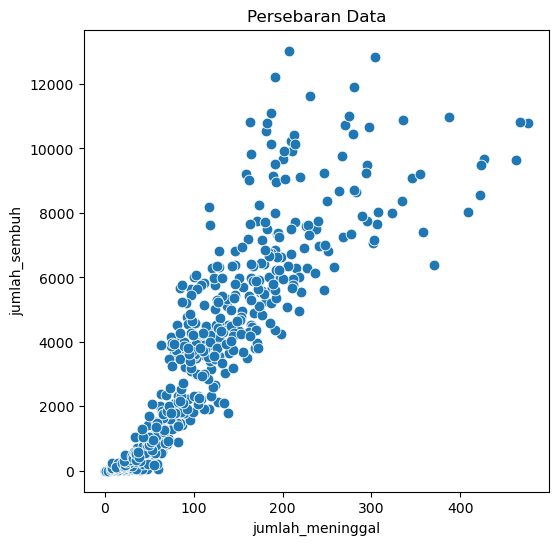

In [4]:
# persebaran data 
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'jumlah_meninggal', y = 'jumlah_sembuh', data = dataset, s = 60)
plt.title('Persebaran Data')
plt.show()

### Elbow Methode

In [5]:
# hitung within cluster sum of squared error (wcss) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11): 
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(dataset)
    wcss.append(kmModel.inertia_)

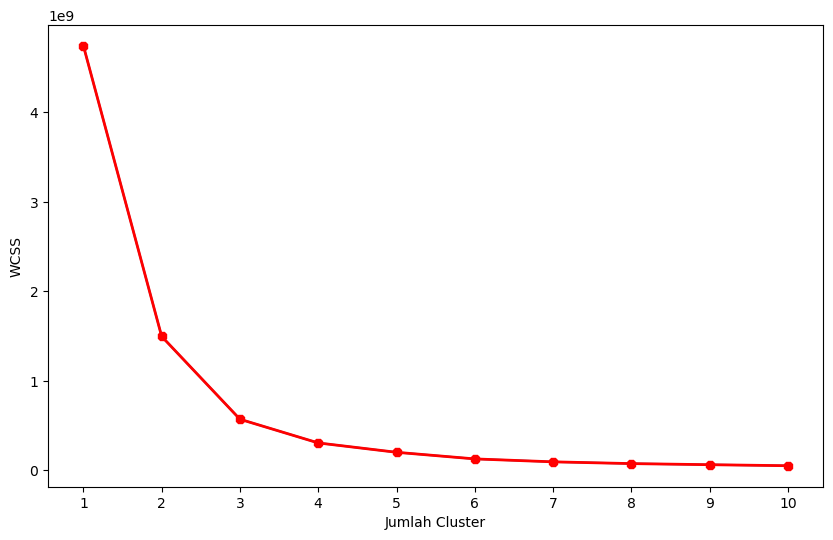

In [6]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [7]:
# model dengan 5 cluster

kmModelFix = KMeans(n_clusters = 5, n_init = 10) # n_init = 10 / n_init = 'auto'
kmModelFix.fit(dataset)

# memprediksi hasil
hasil_prediksi = kmModelFix.predict(dataset)
hasil_prediksi

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3,

In [11]:
dataset.head()

,jumlah_meninggal,jumlah_sembuh,Label
0,0,0,2
1,0,0,2
2,0,0,2
3,0,0,2
4,0,0,2


In [10]:
dataset['Label'] = hasil_prediksi
dataset.tail()

,jumlah_meninggal,jumlah_sembuh,Label
481,358,7396,3
482,409,8024,3
483,423,9480,0
484,463,9645,0
485,467,10807,0


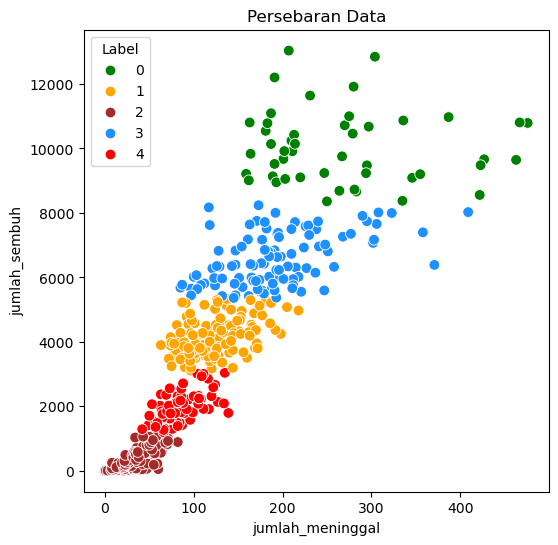

In [9]:
# persebaran data beserta labelnya 

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'jumlah_meninggal', y = 'jumlah_sembuh', hue = 'Label', 
palette = ['green','orange', 'brown', 'dodgerblue', 'red'], legend = 'full', data = dataset,
s = 60) 
plt.title('Persebaran Data')
plt.show()

### Kesimpulan 

1. Label 0 : data yang terdapat di label ini, memiliki jumlah meninggal yang rendah dan jumlah sembuh yang tinggi
2. Label 1 : data yang terdapat di label ini, memiliki jumlah meninggal yang tinggi dan jumlah sembuh yang tinggi
3. Label 2 : data yang terdapat di label ini, memiliki jumlah meninggal yang rendah dan jumlah sembuh yang rendah
4. Label 3 : data yang terdapat di label ini, memiliki jumlah meninggal yang rendah dan jumlah sembuh yang tinggi
5. Label 4 : data yang terdapat di label ini, memiliki jumlah meninggal yang tinggi dan jumlah sembuh yang rendah